<a href="https://colab.research.google.com/github/SahilKadaskar/DIGIT-CLASSICATION-/blob/main/ClassifyingDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
mnist = np.load("mnist.npz")

In [38]:

train_images = mnist["x_train"].reshape(-1, 784) / 255.0
train_labels = mnist["y_train"]

test_images = mnist["x_test"].reshape(-1, 784) / 255.0
test_labels = mnist["y_test"]


In [39]:
train_images = train_images[:10000]
train_labels = train_labels[:10000]

In [40]:
#Activation functions
def relu_forward(x):
    return np.maximum(0, x)

def relu_backward(x):
    return (x > 0).astype(float)

def softmax_forward(x):
    x = x - np.max(x, axis=1, keepdims=True)
    exp_scores = np.exp(x)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [42]:
#Loss and Accuracy
def compute_loss(true_labels, predictions):
    samples = true_labels.shape[0]
    return -np.mean(np.log(predictions[np.arange(samples), true_labels] + 1e-9))

def compute_accuracy(true_labels, predictions):
    return np.mean(true_labels == np.argmax(predictions, axis=1))

In [43]:
#parameters initializing
np.random.seed(42)

INPUT_DIM = 784
HIDDEN_DIM = 128
OUTPUT_DIM = 10

LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 128

weights_input_hidden = np.random.randn(INPUT_DIM, HIDDEN_DIM) * np.sqrt(2 / INPUT_DIM)
bias_hidden = np.zeros((1, HIDDEN_DIM))

weights_hidden_output = np.random.randn(HIDDEN_DIM, OUTPUT_DIM) * np.sqrt(2 / HIDDEN_DIM)
bias_output = np.zeros((1, OUTPUT_DIM))

In [44]:
#forward pass
def forward_pass(inputs):
    hidden_linear = inputs @ weights_input_hidden + bias_hidden
    hidden_activation = relu_forward(hidden_linear)

    output_linear = hidden_activation @ weights_hidden_output + bias_output
    output_probs = softmax_forward(output_linear)

    return hidden_linear, hidden_activation, output_probs

In [45]:
#backward pass
def backward_pass(inputs, labels, hidden_linear, hidden_activation, predictions):
    batch_size = inputs.shape[0]

    grad_output = predictions.copy()
    grad_output[np.arange(batch_size), labels] -= 1
    grad_output /= batch_size

    grad_w_hidden_output = hidden_activation.T @ grad_output
    grad_b_output = np.sum(grad_output, axis=0, keepdims=True)

    grad_hidden = grad_output @ weights_hidden_output.T
    grad_hidden_linear = grad_hidden * relu_backward(hidden_linear)

    grad_w_input_hidden = inputs.T @ grad_hidden_linear
    grad_b_hidden = np.sum(grad_hidden_linear, axis=0, keepdims=True)

    return grad_w_input_hidden, grad_b_hidden, grad_w_hidden_output, grad_b_output

In [46]:
training_loss = []
training_accuracy = []

for epoch in range(EPOCHS):
    shuffle_idx = np.random.permutation(len(train_images))
    train_images = train_images[shuffle_idx]
    train_labels = train_labels[shuffle_idx]

    for start in range(0, len(train_images), BATCH_SIZE):
        batch_images = train_images[start:start+BATCH_SIZE]
        batch_labels = train_labels[start:start+BATCH_SIZE]

        h_lin, h_act, preds = forward_pass(batch_images)
        grads = backward_pass(batch_images, batch_labels, h_lin, h_act, preds)

        weights_input_hidden -= LEARNING_RATE * grads[0]
        bias_hidden -= LEARNING_RATE * grads[1]
        weights_hidden_output -= LEARNING_RATE * grads[2]
        bias_output -= LEARNING_RATE * grads[3]

    _, _, train_preds = forward_pass(train_images)
    loss = compute_loss(train_labels, train_preds)
    acc = compute_accuracy(train_labels, train_preds)

    training_loss.append(loss)
    training_accuracy.append(acc)

    print(f"Epoch {epoch+1}/{EPOCHS} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")

Epoch 1/50 | Loss: 1.7222 | Accuracy: 0.6111
Epoch 2/50 | Loss: 1.2835 | Accuracy: 0.7267
Epoch 3/50 | Loss: 1.0074 | Accuracy: 0.7862
Epoch 4/50 | Loss: 0.8370 | Accuracy: 0.8185
Epoch 5/50 | Loss: 0.7267 | Accuracy: 0.8354
Epoch 6/50 | Loss: 0.6508 | Accuracy: 0.8521
Epoch 7/50 | Loss: 0.5945 | Accuracy: 0.8626
Epoch 8/50 | Loss: 0.5531 | Accuracy: 0.8695
Epoch 9/50 | Loss: 0.5205 | Accuracy: 0.8738
Epoch 10/50 | Loss: 0.5017 | Accuracy: 0.8729
Epoch 11/50 | Loss: 0.4719 | Accuracy: 0.8825
Epoch 12/50 | Loss: 0.4538 | Accuracy: 0.8857
Epoch 13/50 | Loss: 0.4390 | Accuracy: 0.8867
Epoch 14/50 | Loss: 0.4241 | Accuracy: 0.8898
Epoch 15/50 | Loss: 0.4124 | Accuracy: 0.8927
Epoch 16/50 | Loss: 0.4022 | Accuracy: 0.8944
Epoch 17/50 | Loss: 0.3928 | Accuracy: 0.8967
Epoch 18/50 | Loss: 0.3835 | Accuracy: 0.8995
Epoch 19/50 | Loss: 0.3757 | Accuracy: 0.8997
Epoch 20/50 | Loss: 0.3691 | Accuracy: 0.9018
Epoch 21/50 | Loss: 0.3627 | Accuracy: 0.9024
Epoch 22/50 | Loss: 0.3562 | Accuracy: 0.90

In [47]:
_, _, test_predictions = forward_pass(test_images)
print("Test Accuracy:", compute_accuracy(test_labels, test_predictions))

Test Accuracy: 0.9153


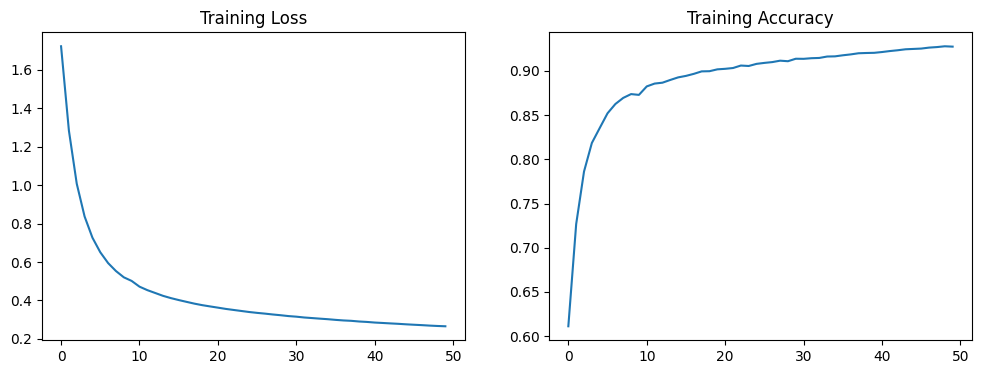

In [48]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(training_loss)
plt.title("Training Loss")

plt.subplot(1,2,2)
plt.plot(training_accuracy)
plt.title("Training Accuracy")

plt.show()

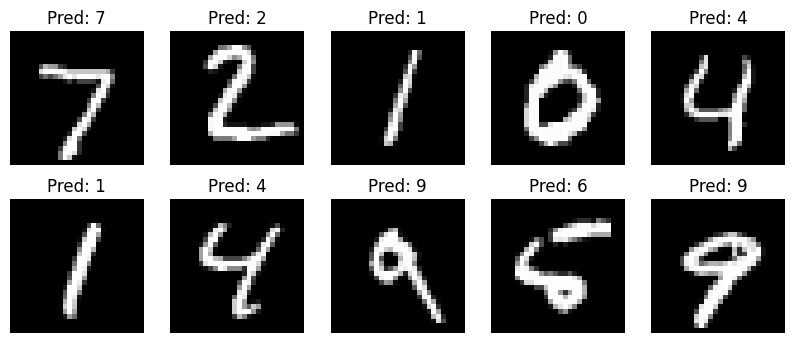

In [49]:
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28,28), cmap="gray")
    ax.set_title(f"Pred: {np.argmax(test_preds[i])}")
    ax.axis("off")
plt.show()